In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv("./Housing.csv")

C:\Users\schmi\AppData\Local\Temp/ipykernel_28060/2118158088.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Housing.csv")


In [134]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158686 non-null  float64
 9   YR_RMDL             80928 non-null   float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            132187 non-null  object 
 13  PRICE               98216 non-null   float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_NUM            158957 non-nul

In [136]:
def find_unique(df):
    objectColumns = df.dtypes[df.dtypes == object]
    numberColumns = df.dtypes[df.dtypes != object]
    text_to_num = list(objectColumns.index)
    num_list = list(numberColumns.index)
    #print('numerical colums are: ', num_list)
    for i in range(len(text_to_num)):
        col_name = text_to_num[i]
        print("\nthere are " + str(df[col_name].nunique()) +" different types in the column "+ col_name +":\n")
        print(df[col_name].unique())

In [137]:
find_unique(df)


there are 14 different types in the column HEAT:

['Warm Cool' 'Hot Water Rad' 'Forced Air' 'Elec Base Brd' 'Ht Pump'
 'Electric Rad' 'Wall Furnace' 'Water Base Brd' 'Evp Cool' 'Air Exchng'
 'No Data' 'Ind Unit' 'Gravity Furnac' 'Air-Oil']

there are 3 different types in the column AC:

['Y' 'N' '0']

there are 6937 different types in the column SALEDATE:

['11/25/2003 0:00' '8/17/2000 0:00' '6/21/2016 0:00' ... '2/16/1995 0:00'
 '2/14/1994 0:00' '8/6/1993 0:00']

there are 2 different types in the column QUALIFIED:

['Q' 'U']

there are 18 different types in the column STYLE:

['3 Story' '4 Story' '2 Story' '2.5 Story Fin' '3.5 Story Fin' '1 Story'
 '1.5 Story Fin' '2.5 Story Unfin' '3.5 Story Unfin' 'Default'
 '1.5 Story Unfin' '4.5 Story Fin' 'Split Level' 'Bi-Level' 'Split Foyer'
 'Vacant' 'Outbuildings' '4.5 Story Unfin' nan]

there are 9 different types in the column STRUCT:

['Row Inside' 'Semi-Detached' 'Single' 'Row End' 'Multi' 'Town Inside'
 'Town End' 'Default' 'Vacant Lan

In [138]:
#eliminate the non residential source
df = df[df.SOURCE == 'Residential']

In [139]:
df.isna().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS                  0
ROOMS                      0
BEDRM                      0
AYB                      241
YR_RMDL                57417
EYB                        0
STORIES                   44
SALEDATE               22513
PRICE                  48796
QUALIFIED                  0
SALE_NUM                   0
GBA                        0
BLDG_NUM                   0
STYLE                      0
STRUCT                     0
GRADE                      0
CNDTN                      0
EXTWALL                    0
ROOF                       0
INTWALL                    0
KITCHENS                   1
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS              656
CITY          

### based on the missing values, lets elimnate some columns to help fill in the dataset
- get rid of cmplx_num and living_gba
-- the number on the building probably doesnt hold much predicive value and we have more values in gba as well
- get rid of the number of units - we have no missing values in rooms, bedrooms, bathrooms, or kitches so this should be fine
- get rid of full address, city, state - none of these matter in prediciton
- get rid of AYB, this information is better captured in eyb which has no missing values
- get rid of sale number and building number
- get rid of national grid, longitude and latitude

In [140]:
df.drop("CMPLX_NUM", inplace=True, axis=1)

In [141]:
df.drop(["NUM_UNITS","AYB","SALEDATE","Unnamed: 0"], inplace=True, axis=1)

In [142]:
df.drop(["SALE_NUM","BLDG_NUM","LIVING_GBA","FULLADDRESS","CITY", "STATE","NATIONALGRID","X","Y","SOURCE","STORIES"], inplace=True, axis=1)

In [143]:
#lets also get rid of census block, that should be convered well enough by census tract
#roof, exterior wall, interior wall, have too many values missing to really be helpful
# honestly how many houses will have more than one kitchen
# more than half of the year remodel missing won't be a helpful predictor
df.drop(["EXTWALL","ROOF","INTWALL","KITCHENS","CENSUS_BLOCK", "YR_RMDL" ], inplace=True, axis=1)
df.isna().sum()

BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
ROOMS                     0
BEDRM                     0
EYB                       0
PRICE                 48796
QUALIFIED                 0
GBA                       0
STYLE                     0
STRUCT                    0
GRADE                     0
CNDTN                     0
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
ZIPCODE                   1
LATITUDE                  1
LONGITUDE                 1
ASSESSMENT_NBHD           1
ASSESSMENT_SUBNBHD    15536
CENSUS_TRACT              1
WARD                      1
SQUARE                    0
QUADRANT                237
dtype: int64

In [144]:
#subneighborhood seems unimportant and has several missing values
#stories and quadrant are missing values and seem to be small enough to eliminate but still have a
#good amount of data

df.drop(["ASSESSMENT_SUBNBHD", "QUADRANT"], inplace=True, axis=1)

# lets get rid of the entries where we only have one value
# only keep the rows if zipcode is not null
df = df[df.ZIPCODE.notnull()]

In [145]:
df.isna().sum()

BATHRM                   0
HF_BATHRM                0
HEAT                     0
AC                       0
ROOMS                    0
BEDRM                    0
EYB                      0
PRICE                48795
QUALIFIED                0
GBA                      0
STYLE                    0
STRUCT                   0
GRADE                    0
CNDTN                    0
FIREPLACES               0
USECODE                  0
LANDAREA                 0
GIS_LAST_MOD_DTTM        0
ZIPCODE                  0
LATITUDE                 0
LONGITUDE                0
ASSESSMENT_NBHD          0
CENSUS_TRACT             0
WARD                     0
SQUARE                   0
dtype: int64

## Price is the most important data we want to fill in
### Find a similar spread in another graph and match based on bins or quantile
### We should also be able to eliminate other less useful pieces of information like fireplaes

# Part A: Cleaning the data

## Implement a sensible approabch for dealing with missing data
### After that
- change all the values in the dataset into numerical values
- substitute dummy columns for categorical variables
- eliminate any colums that may not be relevant to objectives

In [146]:
df.drop(["QUALIFIED", "HEAT","USECODE","LATITUDE","LONGITUDE","CENSUS_TRACT"], inplace=True, axis=1)

<AxesSubplot:>

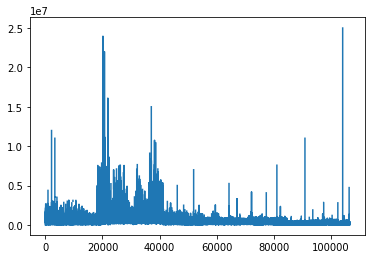

In [147]:
df["PRICE"].plot()

In [148]:
# add a new column that adds rooms baths and half baths 
# plot against stories
df['ALL_RM'] = df.apply(lambda row: row.BATHRM + row.HF_BATHRM + row.ROOMS + row.BEDRM, axis=1)

<AxesSubplot:xlabel='ROOMS'>

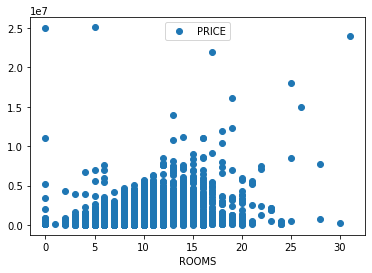

In [149]:
df.plot(x='ROOMS', y='PRICE', style='o')

<AxesSubplot:xlabel='ALL_RM'>

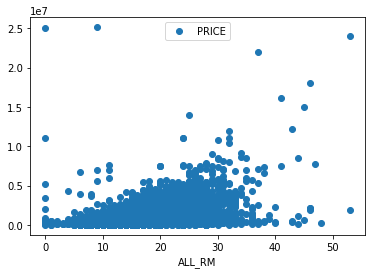

In [150]:
df.plot(x='ALL_RM', y='PRICE', style='o')
#that results in the same distribution, so lets get rid of that

<AxesSubplot:xlabel='EYB'>

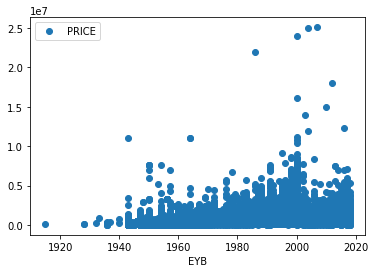

In [151]:
df.plot(x='EYB', y='PRICE', style='o')

In [152]:
#Lets look at ward - it should have 8 categories, perhaps we can bin that and get an average price
# trim all the values 
df["WARD"] = df["WARD"].str[-1]

In [153]:
df['WARD'] = df['WARD'].astype(int)

In [154]:
w_df = df['WARD'].value_counts()
print(w_df)
w_options = df['WARD'].value_counts().keys().to_list()
w_count = df['WARD'].value_counts().to_list()
print(w_options)
print(w_count)

4    20357
5    18130
6    15831
7    15157
3    14484
8     8724
1     8031
2     5981
Name: WARD, dtype: int64
[4, 5, 6, 7, 3, 8, 1, 2]
[20357, 18130, 15831, 15157, 14484, 8724, 8031, 5981]


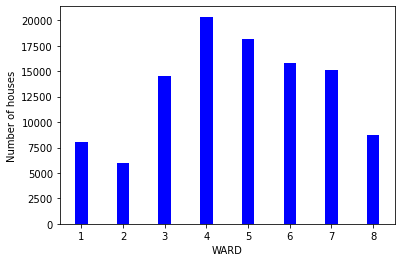

In [155]:
plt.bar(w_options, w_count, width = 0.3, color="blue")
plt.ylabel('Number of houses')
plt.xlabel('WARD')
plt.show()

In [156]:
test = df.groupby('WARD', as_index=False)['PRICE'].mean()
test.head()

,WARD,PRICE
0,1,5.965437e+05
1,2,1.307805e+06
2,3,1.072160e+06
3,4,5.063311e+05
4,5,4.091413e+05


<AxesSubplot:xlabel='WARD'>

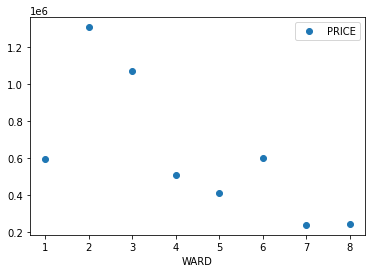

In [157]:
test.plot(x="WARD", y="PRICE", style = 'o')

<AxesSubplot:xlabel='GBA'>

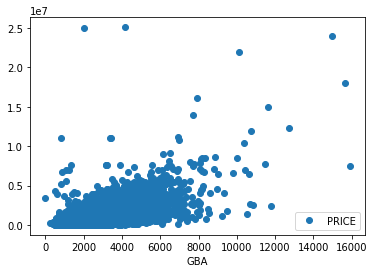

In [158]:
df.plot(x='GBA', y='PRICE', style='o')

<AxesSubplot:xlabel='FIREPLACES'>

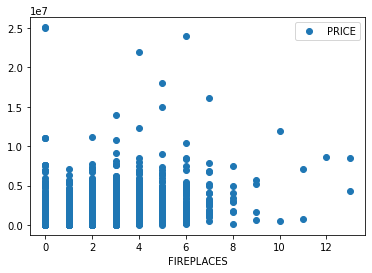

In [159]:
df.plot(x='FIREPLACES', y='PRICE', style='o')

In [160]:
z_df = df['ZIPCODE'].value_counts()
print(z_df)
z_options = df['ZIPCODE'].value_counts().keys().to_list()
z_count = df['ZIPCODE'].value_counts().to_list()
print(z_options)
print(z_count)

20011.0    14835
20002.0    13263
20019.0    11555
20020.0     7619
20016.0     6646
20003.0     6343
20007.0     6229
20001.0     5389
20017.0     4940
20018.0     4881
20015.0     4800
20010.0     4277
20032.0     4035
20012.0     3781
20009.0     3458
20008.0     3403
20024.0      520
20037.0      340
20005.0      222
20036.0      139
20052.0       19
20006.0        1
Name: ZIPCODE, dtype: int64
[20011.0, 20002.0, 20019.0, 20020.0, 20016.0, 20003.0, 20007.0, 20001.0, 20017.0, 20018.0, 20015.0, 20010.0, 20032.0, 20012.0, 20009.0, 20008.0, 20024.0, 20037.0, 20005.0, 20036.0, 20052.0, 20006.0]
[14835, 13263, 11555, 7619, 6646, 6343, 6229, 5389, 4940, 4881, 4800, 4277, 4035, 3781, 3458, 3403, 520, 340, 222, 139, 19, 1]


In [161]:
print(len(z_options))

22


<AxesSubplot:xlabel='ZIPCODE'>

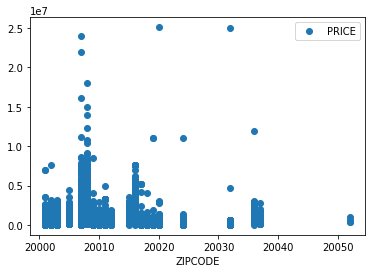

In [162]:
df.plot(x='ZIPCODE', y='PRICE', style='o')

In [163]:
test2 = df.groupby('ZIPCODE', as_index=False)['PRICE'].mean()
test2.head()

,ZIPCODE,PRICE
0,20001.0,543073.695160
1,20002.0,485563.146517
2,20003.0,651043.804154
3,20005.0,947229.549618
4,20006.0,NaN


<AxesSubplot:xlabel='ROOMS'>

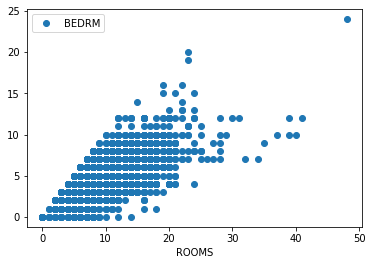

In [164]:
df.plot(x='ROOMS', y='BEDRM', style='o')

<AxesSubplot:xlabel='ROOMS'>

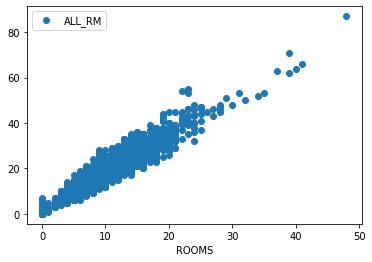

In [165]:
df.plot(x='ROOMS', y='ALL_RM', style='o')

<AxesSubplot:xlabel='ROOMS'>

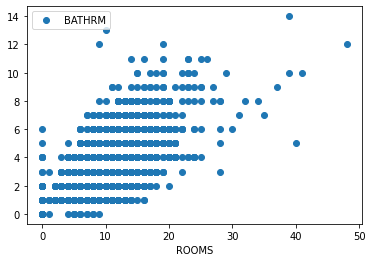

In [166]:
df.plot(x='ROOMS', y='BATHRM', style='o')

<AxesSubplot:xlabel='ROOMS'>

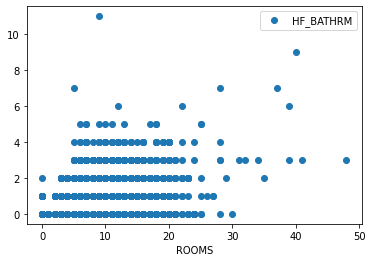

In [167]:
df.plot(x='ROOMS', y='HF_BATHRM', style='o')

<AxesSubplot:xlabel='HF_BATHRM'>

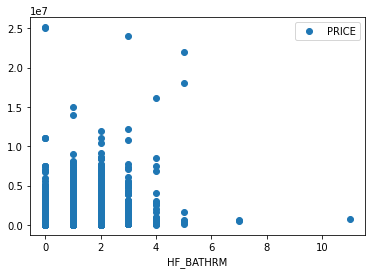

In [168]:
df.plot(x='HF_BATHRM', y='PRICE', style='o')

Y    66345
N    40307
0       43
Name: AC, dtype: int64
['Y', 'N', '0']
[66345, 40307, 43]


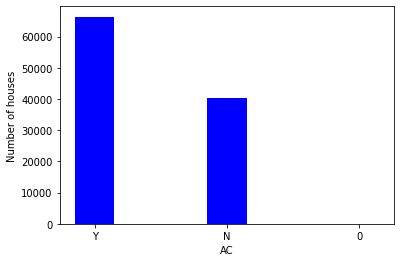

In [169]:
ac_df = df['AC'].value_counts()
print(ac_df)
ac_options = df['AC'].value_counts().keys().to_list()
ac_count = df['AC'].value_counts().to_list()
print(ac_options)
print(ac_count)

plt.bar(ac_options, ac_count, width = 0.3, color="blue")
plt.ylabel('Number of houses')
plt.xlabel('AC')
plt.show()

<AxesSubplot:xlabel='AC'>

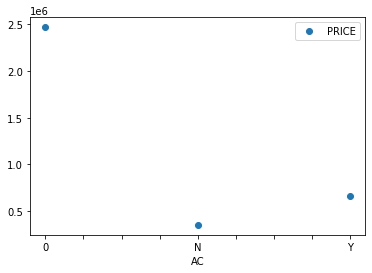

In [170]:
ac = df.groupby('AC', as_index=False)['PRICE'].mean()
ac.head()

ac.plot(x="AC", y="PRICE", style = 'o')

Average      58216
Good         37497
Very Good     8130
Excellent     1338
Fair          1320
Poor           175
Default         19
Name: CNDTN, dtype: int64
['Average', 'Good', 'Very Good', 'Excellent', 'Fair', 'Poor', 'Default']
[58216, 37497, 8130, 1338, 1320, 175, 19]


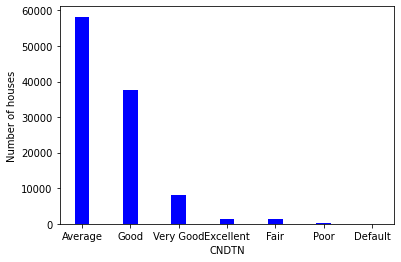

In [171]:
c_df = df['CNDTN'].value_counts()
print(c_df)
c_options = df['CNDTN'].value_counts().keys().to_list()
c_count = df['CNDTN'].value_counts().to_list()
print(c_options)
print(c_count)

plt.bar(c_options, c_count, width = 0.3, color="blue")
plt.ylabel('Number of houses')
plt.xlabel('CNDTN')
plt.show()

<AxesSubplot:xlabel='CNDTN'>

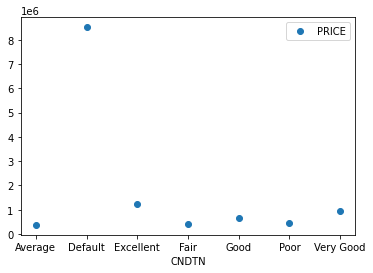

In [172]:
c = df.groupby('CNDTN', as_index=False)['PRICE'].mean()

c.plot(x="CNDTN", y="PRICE", style = 'o')

# Lets fill in price based on the average from the ward
## there are 8 wards and we can match up the average from that

In [173]:
ward_op = test.values.tolist()

In [174]:
print(ward_op)

[[1.0, 596543.6801034706], [2.0, 1307804.877539005], [3.0, 1072159.5899480947], [4.0, 506331.0792431082], [5.0, 409141.3304084404], [6.0, 599149.5130099917], [7.0, 237068.704737516], [8.0, 241436.1536269998]]


In [175]:
print(ward_op[0][0])
print(ward_op[0][1])
print(len(ward_op))

1.0
596543.6801034706
8


In [176]:
def ward_price_lookup(cols):
    ward = cols[0]
    price = cols[1]
    if pd.isnull(price):
        if ward == ward_op[0][0]:
            return ward_op[0][1]
        elif ward == ward_op[1][0]:
            return ward_op[1][1]
        elif ward == ward_op[2][0]:
            return ward_op[2][1]
        elif ward == ward_op[3][0]:
            return ward_op[3][1]
        elif ward == ward_op[4][0]:
            return ward_op[4][1]
        elif ward == ward_op[5][0]:
            return ward_op[5][1]
        elif ward == ward_op[6][0]:
            return ward_op[6][1]
        else:
            return ward_op[7][1]
    
    else:
        return price

In [177]:
df['PRICE'] = df[['WARD','PRICE']].apply(ward_price_lookup,axis=1)

In [178]:
df.isna().sum()

BATHRM               0
HF_BATHRM            0
AC                   0
ROOMS                0
BEDRM                0
EYB                  0
PRICE                0
GBA                  0
STYLE                0
STRUCT               0
GRADE                0
CNDTN                0
FIREPLACES           0
LANDAREA             0
GIS_LAST_MOD_DTTM    0
ZIPCODE              0
ASSESSMENT_NBHD      0
WARD                 0
SQUARE               0
ALL_RM               0
dtype: int64

## Now that we have all the price values filled in, lets delete other irrelevant columns and convert everything to numerical values and create dummies for the categorical variables

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106695 entries, 0 to 106695
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BATHRM             106695 non-null  int64  
 1   HF_BATHRM          106695 non-null  int64  
 2   AC                 106695 non-null  object 
 3   ROOMS              106695 non-null  int64  
 4   BEDRM              106695 non-null  int64  
 5   EYB                106695 non-null  int64  
 6   PRICE              106695 non-null  float64
 7   GBA                106695 non-null  float64
 8   STYLE              106695 non-null  object 
 9   STRUCT             106695 non-null  object 
 10  GRADE              106695 non-null  object 
 11  CNDTN              106695 non-null  object 
 12  FIREPLACES         106695 non-null  int64  
 13  LANDAREA           106695 non-null  int64  
 14  GIS_LAST_MOD_DTTM  106695 non-null  object 
 15  ZIPCODE            106695 non-null  float64
 16  AS

### ward and zipcode should fill in the genral area so get rid of nbhd and square
### all room was a variable I made, so delete it. - in that there was a linear correlation between the number of rooms and all rooms, so eliminate everything but rooms
### Structure has less options and should be able to fill in for style
### there are less condidtions than grades so eliminate grade
### EYB should cover what the last mod does
### Fireplaces does not have much correlation or relevance
### GBA should be enough to go off of, eliminate land area
### AC is unhelpful since 0 means nothing

In [180]:
df.drop(['ASSESSMENT_NBHD','SQUARE', 'ALL_RM','STRUCT','GIS_LAST_MOD_DTTM', 'FIREPLACES','ZIPCODE','LANDAREA','AC'], inplace=True, axis=1)

In [181]:
#keep only bathrooms and rooms since there is a pretty linear relationship with both
df.drop(['HF_BATHRM', 'BEDRM','BATHRM'], inplace=True, axis=1)

In [182]:
df.drop(['CNDTN'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106695 entries, 0 to 106695
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ROOMS   106695 non-null  int64  
 1   EYB     106695 non-null  int64  
 2   PRICE   106695 non-null  float64
 3   GBA     106695 non-null  float64
 4   STYLE   106695 non-null  object 
 5   GRADE   106695 non-null  object 
 6   WARD    106695 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 6.1+ MB


In [183]:
## in the end we have kept bathrooms bedrooms EYB price GBA struct condition and ward

In [184]:
objectColumns = df.dtypes[df.dtypes == object]
numberColumns = df.dtypes[df.dtypes != object]
text_to_num = list(objectColumns.index)

In [185]:
X = pd.get_dummies(df, columns=text_to_num, drop_first=True) 
X = X.astype('int')
print(X.shape)

(106695, 34)


# Part B: Dimmensional Reduction

## Use SVD and PCA
- in each case show eigenvectors and eigenvalues




In [186]:
X.drop(['PRICE'], inplace=True, axis=1)
X = X.T
y = df['PRICE']
y = y.astype('int')
print(X.shape)
print(y.shape)

(33, 106695)
(106695,)


Using PCA:

In [187]:
C = np.dot(X, X.T)
v, w = np.linalg.eig(C)
print('Eigen-values: v=\n', v,'\n')
print('Eigen-vectors: w=\n', w)

Eigen-values: v=
 [-2.50944087e+09  2.65043088e+09  1.32292349e+09 -6.07381999e+06
  3.62701633e+04  2.27954112e+04  1.34079204e+04  8.16082558e+03
  7.10140502e+03  3.77599581e+03  3.03335938e+03  2.23832554e+03
  1.62161502e+03  7.78131915e+02  6.73732242e+02  3.49775473e+02
  2.93977919e+02  2.71622404e+02  2.62961754e+02  1.49133867e+02
  1.28623084e+02  1.10684127e+02  9.29623468e+01  7.85767369e+01
  6.96567240e+01  1.89584355e+01  1.39647162e+01  1.29130624e+01
  7.97145662e+00  5.99726440e+00  9.93280548e-01  1.99880017e+00
  1.99979870e+00] 

Eigen-vectors: w=
 [[ 6.00914112e-01 -5.73791674e-01 -1.77233801e-01 ...  4.13227669e-06
  -1.96982850e-05  5.31757081e-06]
 [-5.77039211e-01 -3.31870489e-01 -7.44786613e-01 ...  9.28868461e-09
   2.57440265e-08 -5.08271324e-09]
 [-4.13555065e-01 -6.69111075e-01  6.15388933e-01 ... -8.19606595e-09
  -2.15186262e-08  4.75273668e-09]
 ...
 [ 1.03860163e-05 -7.46587845e-06 -1.58906476e-05 ...  3.36202161e-06
  -2.05057136e-04  4.04116395e-05

In [188]:
print(X.shape)
print(w.shape)

(33, 106695)
(33, 33)


In [189]:
sv = np.cumsum(v)/sum(v)

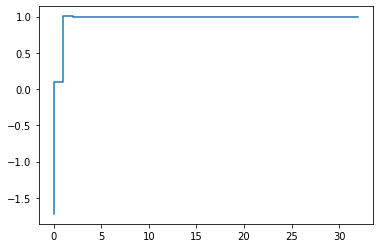

sv = [-1.72122203  0.09670485  1.00409625  0.99993022  0.9999551   0.99997074
  0.99997993  0.99998553  0.9999904   0.99999299  0.99999507  0.99999661
  0.99999772  0.99999825  0.99999872  0.99999896  0.99999916  0.99999934
  0.99999952  0.99999963  0.99999971  0.99999979  0.99999985  0.99999991
  0.99999996  0.99999997  0.99999998  0.99999999  0.99999999  1.
  1.          1.          1.        ]


In [190]:
#sv = np.insert(sv, 0, 0)
plt.step(list(range(len(sv))), sv)
plt.show()
print('sv =', sv)

Use SVD

In [191]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
print('Eigen-vectors: U=\n', U, U.shape,'\n')
print('Eigen-values: s=', s, s.shape)
print('Eigen-vectors: VT=', VT.shape,'\n')

Eigen-vectors: U=
 [[-2.81731774e-03 -2.91065313e-04  1.60215037e-01 ...  3.37014010e-06
   3.92974923e-06  1.05781447e-05]
 [-7.14965470e-01 -6.99149398e-01 -3.36371965e-03 ...  2.12951701e-08
  -3.09244594e-07 -9.31278145e-08]
 [-6.99152022e-01  7.14970462e-01  4.32055151e-04 ... -6.89243031e-10
  -3.77716126e-08 -8.60793698e-09]
 ...
 [-4.49685872e-08 -4.11917743e-07 -1.26830809e-04 ...  6.21907691e-06
   1.08549657e-04  9.33350013e-05]
 [-1.16584153e-05  3.70369659e-05 -1.15896602e-02 ... -3.56115573e-05
   8.75417188e-06  9.90519009e-06]
 [-3.58614621e-05  6.11867069e-05 -2.49423480e-02 ... -3.57779043e-05
   4.54360461e-06  3.37061920e-06]] (33, 33) 

Eigen-values: s= [8.74477104e+05 2.10239926e+05 6.11076381e+02 5.49251261e+02
 1.59104620e+02 1.40962655e+02 1.14902045e+02 8.97383548e+01
 8.09763431e+01 5.85611198e+01 5.50192241e+01 4.40561550e+01
 3.68266797e+01 2.69176228e+01 2.47858747e+01 1.83778183e+01
 1.70276542e+01 1.59453126e+01 1.54905718e+01 1.21508180e+01
 1.12392948e

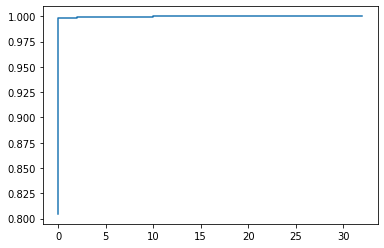

sv2 = [0.80459309 0.99803164 0.99859389 0.99909924 0.99924563 0.99937533
 0.99948105 0.99956362 0.99963812 0.999692   0.99974263 0.99978316
 0.99981705 0.99984181 0.99986462 0.99988153 0.99989719 0.99991186
 0.99992612 0.9999373  0.99994764 0.99995719 0.99996585 0.99997348
 0.99998089 0.99998489 0.99998833 0.99999163 0.99999423 0.99999648
 0.99999778 0.99999908 1.        ]


In [192]:
sv2 = np.cumsum(s)/sum(s)
#sv = np.insert(sv, 0, 0)
plt.step(list(range(len(sv2))), sv2)
plt.show()
print('sv2 =', sv2)

## Show Scree Plot

### Answer the question
- How many dimmensitons of the dataset should be used to retain over 90% of the data variance

PCA converges around 4
SVD converges at 2

# Part C
## Divide dataset
- Use Linear regression model to predict

In [193]:
#Linear Regression
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [194]:
X = pd.get_dummies(df, columns=text_to_num, drop_first=True) 
X = X.astype('int')
X.drop(['PRICE'], inplace=True, axis=1)
y = df['PRICE']
y = y.astype('int')
print(X.shape)
print(y.shape)
X.head()

(106695, 33)
(106695,)


,ROOMS,EYB,GBA,WARD,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,STYLE_3 Story,...,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good
0,8,1972,2522,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,11,1972,2567,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,9,1984,2522,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,8,1984,2484,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,11,1985,5255,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45) 

In [196]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [197]:
print('coefficient', lm.coef_)
print("intercept:",lm.intercept_)

coefficient [ 5.88545882e+02  2.14119164e+03  9.03388941e+01 -5.62344308e+04
  3.82176429e+03  4.40386981e+04  7.40623042e+03  2.20016087e+04
 -2.50656197e+04 -1.24549337e+04 -2.72653619e+04  6.04674533e+05
  2.30053843e+04 -6.87742872e+05 -4.46434317e+04 -6.06653433e+04
  4.60327585e+02 -2.04413741e+05 -6.28549651e+04 -6.88753966e+03
  4.65501361e+04 -3.98784502e+04  4.17308602e+05  9.65943468e+05
  1.40818872e+06  2.57765349e+06  1.31883738e+06 -2.64392384e+04
  1.42379280e+05  1.79825536e+04  9.39233656e+05  5.97733939e+05
  2.49804592e+05]
intercept: -3614367.678095081


In [198]:
predictions = lm.predict(X_test)
print(len(X_test))
print(type(predictions))
print(predictions.shape)
print(X_test.shape)
print(y_test.shape)
print(len(predictions))
print(len(y_test))
print(lm.score(X_test, y_test))

26674
<class 'numpy.ndarray'>
(26674,)
(26674, 33)
(26674,)
26674
26674
0.42567998949109664



## Convert Price into categorical value

In [199]:
def convert_price_category(cols):
    for price in cols:
        if price <= 30000:
            return 0
        elif price <= 60000:
            return 1
        elif price <= 90000:
            return 2
        elif price<= 130000:
            return 3
        else:
            return 4

In [200]:
df['PRICE'] = df[['PRICE']].apply(convert_price_category,axis=1)

In [201]:
y = df['PRICE']
print(y.unique(), y.nunique())

[4 1 0 3 2] 5


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45) 


### Use each of the following to predict
- Logistic Regression
- Neural Network
- Naive Bays



# LOGISTIC REGRESSION

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
log_reg = LogisticRegression(solver='saga')
log_reg.fit(X_train, y_train.ravel())

C:\Users\schmi\anaconda3\envs\hpenv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [204]:
Log_predictions = log_reg.predict(X_test)
print(Log_predictions.shape, Log_predictions.dtype)
print(y_test.shape, y_test.dtype)

(26674,) int64
(26674,) int64


In [205]:
cm = confusion_matrix(y_test, Log_predictions)
print(cm)  
score = accuracy_score(y_test, Log_predictions)
print(score)

[[    0     0     0     0    52]
 [    0     0     0     0   157]
 [    0     0     0     0   416]
 [    0     0     0     0   867]
 [    0     0     0     0 25182]]
0.9440653820199445


# NEURAL NET


In [206]:
#Leaky ReLu Activation
def g1(t):
    return np.maximum(0.01 * t, t)
def g1_prime(t):
    return np.where(t>0, 1, 0.01)
def g2(x):
    return 1. / (1 + np.exp(-x))

In [ ]:
# The activation Functions
#sigmoid
def g1(t):
    return 1/(1 + np.exp(-t))
def g1_prime(t):
    return g1(t)*(1-g1(t))
# softmax
def g2(t):
    e = np.exp(t)
    return e / e.sum(axis=1, keepdims=True)

In [ ]:
#Leaky ReLu Activation
def g1(t):
    return np.maximum(0.01 * t, t)
def g1_prime(t):
    return np.where(t>0, 1, 0.01)
# softmax
def g2(t):
    e = np.exp(t)
    return e / e.sum(axis=1, keepdims=True)  

In [207]:
def NN(xx, y, n_h, n_y, alpha, iterations):
	stage_1 = iterations//2; alpha2 = alpha/2.
	stage_2 = iterations//1.75; alpha3 = alpha/4.
	stage_3 = iterations//1.5; alpha4 = alpha/8.
	cost_list = [[],[]]
	m = xx.shape[1]
	n_x = xx.shape[0]
	print(xx.shape)
	print(n_x)
	W1 = np.random.randn(n_h, n_x)
	print(W1, W1.shape)
	b1 = np.random.randn(n_h, 1)
	print(b1, b1.shape)
	W2 = np.random.randn(n_y, n_h)
	b2 = np.random.randn(n_y, 1)
	for i in range(iterations):
		Z1 = np.dot(W1, xx) + b1
		A1 = g1(Z1)
		Z2 = np.dot(W2, A1) + b2
		A2 = g2(Z2)
		#if i%100 == 0:
			#cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
			#cost_list[0].append(i)
			#cost_list[1].append(cost)
		dZ2 = A2 - y
		dW2 = (1/m) * np.dot(dZ2, A1.T)
		db2 = (1/m) * np.sum(dZ2)
		dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
		dW1 = (1/m) * np.dot(dZ1, xx.T)
		db1 = (1/m) * np.sum(dZ1)
		W2 = W2 - alpha * dW2
		b2 = b2 - alpha * db2
		W1 = W1 - alpha * dW1
		b1 = b1 - alpha * db1
		if i>stage_1: alpha = alpha2
		elif i>stage_2: alpha = alpha3
		elif i>stage_3: alpha = alpha4
	return W1, b1, W2, b2, cost_list


In [208]:
n_h = 2; n_y = 1
alpha = 0.05
iterations = 50000

In [209]:
print(X_train.T.shape, y_train.T.shape)

(33, 80021) (80021,)


In [210]:
y_train_N = y_train.values.reshape(-1,1)
print(y_train_N.shape)

(80021, 1)


In [211]:
print(X_train.shape, y_train_N.shape)
print(X_train.T.shape, y_train_N.T.shape)

(80021, 33) (80021, 1)
(33, 80021) (1, 80021)


In [212]:
W1, b1, W2, b2, cost_list = NN(X_train.T, y_train_N.T, n_h, n_y, alpha, iterations)

(33, 80021)
33
[[ 0.45601404  0.61211428 -0.35443939 -1.54777731 -0.06479802  0.13972085
   1.49830974  1.29409606 -1.30024401 -2.17307635  0.79467073 -0.04401294
   1.40985275 -1.73877353  0.88443501 -0.25036376 -3.18249823  2.93437843
   0.31761618 -2.65783612 -1.19072162  1.42104997 -0.21947073  1.29683757
   0.12816242  0.01135696  0.34448596  0.93302247 -1.34916548  0.90084609
  -0.36830384 -1.69660973  0.0052122 ]
 [-1.19872194  1.49733318  0.32094507  0.03324901  1.64442269  1.27985283
   1.30204092 -2.38037565  0.54310121  0.56368119  0.90240138 -0.77034764
   0.51563492 -0.49164392 -1.0589711   1.17037198  0.67232807 -0.46070089
  -0.894736    1.48503733  0.85901126 -0.95929124  1.21373379  1.63390323
   1.73314469 -0.3743149   1.14864069  0.45227917  0.76920464  0.26807378
   0.64225215  1.56616328  0.25643274]] (2, 33)
[[ 1.69520726]
 [-0.09200439]] (2, 1)


C:\Users\schmi\anaconda3\envs\hpenv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


KeyboardInterrupt: 

In [ ]:
z1 = np.dot(w_1, X) + b_1
a1 = g1(z1)
z2 = np.dot(w_2, a1) + b_2
a2 = g2(z2.T).T
pred = np.zeros(1500, dtype=int)
for i in range(1500):
    if a2[1,i]>a2[0,i] and a2[1,i]>a2[2,i]: pred[i]=1
    elif a2[2,i]>a2[0,i] and a2[2,i]>a2[1,i]: pred[i]=2
cm = confusion_matrix(labels, pred)
print(cm)

# 

# NAIVE BAYES

In [213]:
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (80021, 33) (80021,)
Test: (26674, 33) (26674,)


In [214]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.25871635300292417


In [215]:
model = MultinomialNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.4673839694084127


In [216]:
NBmodel = ComplementNB()
NBmodel.fit(X_train, y_train)
predicted = NBmodel.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.4801304641223664


# Finally, validate the models with testing data

In [217]:
# we have log_predictions, NBmodel, and NN_predictions
#first create some sample data
test_data = X[:10]

In [218]:
print(test_data.shape)

(10, 33)


In [219]:
print(test_data)

   ROOMS   EYB   GBA  WARD  STYLE_1.5 Story Fin  STYLE_1.5 Story Unfin  \
0      8  1972  2522     2                    0                      0   
1     11  1972  2567     2                    0                      0   
2      9  1984  2522     2                    0                      0   
3      8  1984  2484     2                    0                      0   
4     11  1985  5255     2                    0                      0   
5     10  1972  5344     2                    0                      0   
6      5  1957  1260     2                    0                      0   
7      8  1972  2401     2                    0                      0   
8      7  1967  1488     2                    0                      0   
9      6  1950  1590     2                    0                      0   

   STYLE_2 Story  STYLE_2.5 Story Fin  STYLE_2.5 Story Unfin  STYLE_3 Story  \
0              0                    0                      0              1   
1              0           

In [ ]:
#test_data.to_csv('TEST_Final.csv')

# Opened and edit the CSV

In [220]:
test_df = pd.read_csv("./TEST_Final.csv")

In [221]:
print(test_df.shape)
test_df.info

(10, 34)


<bound method DataFrame.info of    Unnamed: 0  ROOMS   EYB   GBA  WARD  STYLE_1.5 Story Fin  \
0           0      8  1970  1800     2                    0   
1           1     10  1972  2567     3                    0   
2           2      3  1984  1400     4                    0   
3           3      8  1987  2500     2                    0   
4           4     11  1985  5255     5                    0   
5           5      7  1980  5344     8                    0   
6           6      5  1941  1260     1                    0   
7           7      8  1972  2401     9                    0   
8           8      8  1967  1488     3                    0   
9           9      5  2000  1590     2                    0   

   STYLE_1.5 Story Unfin  STYLE_2 Story  STYLE_2.5 Story Fin  \
0                      0              0                    0   
1                      0              0                    0   
2                      0              0                    0   
3                 

In [222]:
test_df.head()

,Unnamed: 0,ROOMS,EYB,GBA,WARD,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,STYLE_2.5 Story Unfin,...,GRADE_Exceptional-A,GRADE_Exceptional-B,GRADE_Exceptional-C,GRADE_Exceptional-D,GRADE_Fair Quality,GRADE_Good Quality,GRADE_Low Quality,GRADE_No Data,GRADE_Superior,GRADE_Very Good
0,0,8,1970,1800,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,10,1972,2567,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2,3,1984,1400,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,8,1987,2500,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,11,1985,5255,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [223]:
test_df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [224]:
test_df.shape

(10, 33)

In [225]:
NBpredicted = NBmodel.predict(test_df)

In [226]:
print(NBpredicted)

[4 4 3 4 4 4 3 4 3 4]


In [227]:
Linear_predictions = lm.predict(test_df)

In [228]:
print(Linear_predictions)

[ 895979.0246119   901883.31451468  774408.55883681  995616.50836753
 1073280.12353678  935017.16881604  646259.29726283  546103.63914806
  575191.85605187  851913.82010324]


In [229]:
def convert_price_category(cols):
    for x in range(len(cols)):
        price = cols[x]
        if price <= 30000:
            print(0)
        elif price <= 60000:
            print(1)
        elif price <= 90000:
            print(2)
        elif price<= 130000:
            print(3)
        else:
            print(4)

In [230]:
convert_price_category(Linear_predictions)

4
4
4
4
4
4
4
4
4
4


In [231]:
log_predictions = log_reg.predict(test_df)

In [232]:
print(log_predictions)

[4 4 4 4 4 4 4 4 4 4]
